In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

epoch=10000 loss=0.15877341959204122
epoch=10000 accu=0.94


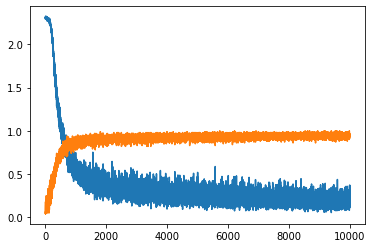

CPU times: user 1min 4s, sys: 26 s, total: 1min 30s
Wall time: 24.5 s


In [4]:
%%time
from common.functions import softmax, sigmoid, cross_entropy_error
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# NN structure
hidden = 50
W1 = 0.01 * np.random.randn(len(x_train[0]), hidden)
b1 = np.zeros(hidden)
W2 = 0.01 * np.random.randn(hidden, len(t_train[0]))
b2 = np.zeros(len(t_train[0]))

iters_num = 10000  # 繰り返しの回数を適宜設定すaる
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

# Train NN
loss_list, accu_list = [], []
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    xx = x_train[batch_mask]
    tt = t_train[batch_mask]
    
    # Forward propagation
    a1 = np.dot(xx, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    yy = softmax(a2)
    l = cross_entropy_error(yy, tt)
    loss_list.append(l)
    a = (tt.argmax(axis=1)==yy.argmax(axis=1)).sum() / len(tt)
    accu_list.append(a)

    # Back propagation
    dout = (yy - tt) / len(tt)    # SoftmaxWithSigma

    dx = np.dot(dout, W2.T)       # Affine 2
    dW2 = np.dot(z1.T, dout)
    db2 = np.sum(dout, axis=0)
    dout = dx

    dout = dout * (1.0 - z1) * z1 # Sigmoid

    dx = np.dot(dout, W1.T)       # Affine 1
    dW1 = np.dot(xx.T, dout)
    db1 = np.sum(dout, axis=0)

    # Update params
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2        
    
#Plot accuracy over time    
print(f"epoch={len(loss_list)} loss={loss_list[-1]}")
print(f"epoch={len(loss_list)} accu={accu_list[-1]}")
plt.plot(range(len(loss_list)), loss_list)
plt.plot(range(len(accu_list)), accu_list)
plt.show()